# Simple Segmentation Using Color Spaces
- https://realpython.com/python-opencv-color-spaces/

In [213]:
import cv2

In [214]:
flags = [i for i in dir(cv2) if i.startswith("COLOR_")]

In [215]:
# The first characters after COLOR_ indicate the
# origin color space, and the characters after
# the 2 are the target color space
flags[:5],len(flags)

(['COLOR_BAYER_BG2BGR',
  'COLOR_BAYER_BG2BGRA',
  'COLOR_BAYER_BG2BGR_EA',
  'COLOR_BAYER_BG2BGR_VNG',
  'COLOR_BAYER_BG2GRAY'],
 274)

In [216]:
import matplotlib.pyplot as plt
import numpy as np

In [217]:
base_path = r"C:\Users\ANISH JAIN\Downloads"
img_path =r"C:\Users\ANISH JAIN\Downloads\nemo.webp"

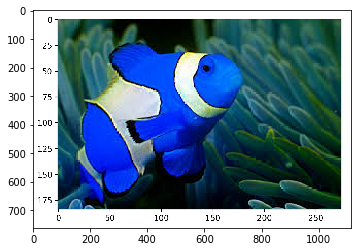

(762, 1114, 3)


In [218]:
nemo = plt.imread(img_path)
plt.imshow(nemo)
plt.show()
print(nemo.shape)

### Note
cv2 dfaults reads the image in BGR formate so to convert in RGB do this

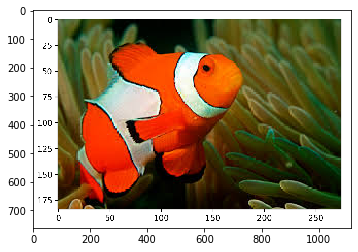

In [219]:
# OpenCV by default reads images in BGR format.
nemo = cv2.cvtColor(nemo,cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

##### segmentation using clustering

In [220]:
res_nemo = nemo.reshape(nemo.shape[0]*nemo.shape[1],nemo.shape[2])
res_nemo.shape

(848868, 3)

In [221]:
from sklearn.cluster import KMeans

In [222]:
cluster = KMeans(n_clusters=10,random_state=50).fit(res_nemo)
type(cluster)

sklearn.cluster._kmeans.KMeans

In [223]:
cluster_nemo = cluster.cluster_centers_[cluster.labels_]
cluster_nemo.shape


(848868, 3)

In [224]:
#into list
len(cluster_nemo.tolist())

848868

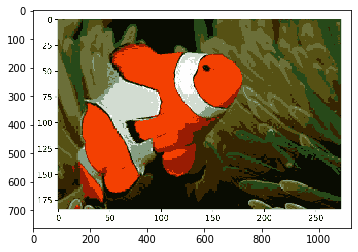

In [225]:
res_cluster_nemo = cluster_nemo.reshape(nemo.shape[0] , 
                                        nemo.shape[1],nemo.shape[2])
plt.imshow(res_cluster_nemo/255)
plt.show()

In [226]:
#HSV is a good choice of color space for segmenting by color,
#let's see why

In [227]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [228]:
#Normalize and convert to list for plotting in 3D
pixel_colors = nemo.reshape(np.shape(nemo)[0]*nemo.shape[1],
                           nemo.shape[2])
norm = colors.Normalize(vmin = -1., vmax = 1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


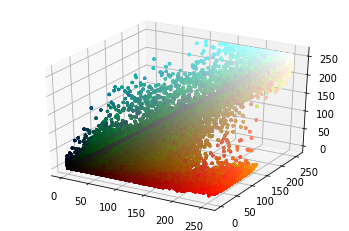

In [229]:
r ,g ,b = cv2.split(nemo)
fig = plt.figure()
axis  = fig.add_subplot(1,1,1,projection = "3d")

axis.scatter(r.flatten(),g.flatten(),b.flatten(),
            facecolors = pixel_colors,marker = ".")
# axis.set_xlabel("Red")
# axis.set_ylabel("Green")
# axis.set_zlabel("Blue")
plt.show()

As mentioned briefly above, HSV stands for Hue, Saturation, and Value (or brightness), and is a cylindrical color space. The colors, or hues, are modeled as an angular dimension rotating around a central, vertical axis, which represents the value channel. Values go from dark (0 at the bottom) to light at the top. The third axis, saturation, defines the shades of hue from least saturated, at the vertical axis, to most saturated furthest away from the center:

[]

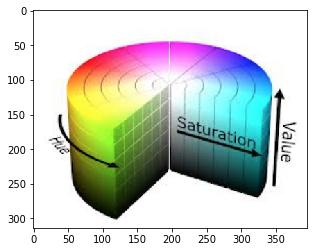

In [230]:
import os
hsv = plt.imread(os.path.join(base_path , "hsv.webp"))
plt.imshow(hsv)
plt.plot()

In [231]:
hsv_nemo = cv2.cvtColor(nemo,cv2.COLOR_RGB2HSV)


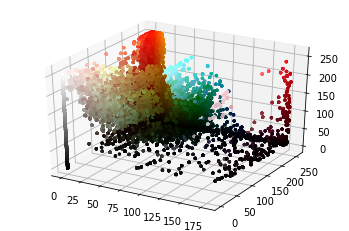

In [232]:
h ,s , v = cv2.split(hsv_nemo)
fig = plt.figure()

axis = fig.add_subplot(1,1,1,projection = "3d")
axis.scatter(h.flatten(),s.flatten(),v.flatten(),
             facecolors = pixel_colors,
            marker  = ".")
plt.show()


In [315]:
light_orange = (1, 190, 200)
dark_orange = (255, 255, 255)

from matplotlib.colors import hsv_to_rgb
lo_squ = np.full((10,10,3),light_orange,dtype=np.uint8)/ 255.
do_squ = np.full((10,10,3),dark_orange,dtype=np.uint8)/ 255.

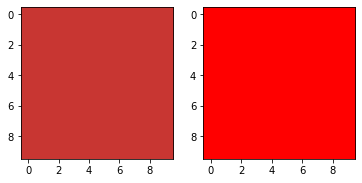

In [316]:
#without rgb
# plt.subplot(1,2,1)
# plt.imshow(do_squ)

plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(lo_squ))

plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(do_squ))


plt.show()

In [317]:
mask  = cv2.inRange(hsv_nemo, light_orange,dark_orange)
mask.shape,mask.max(),mask.min(),hsv_nemo.shape

((762, 1114), 255, 0, (762, 1114, 3))

In [318]:
result = cv2.bitwise_and(nemo,nemo,mask = mask)


In [319]:
result.shape

(762, 1114, 3)

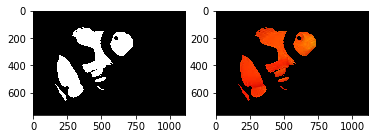

In [320]:
plt.subplot(1,2,1)
plt.imshow(mask,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

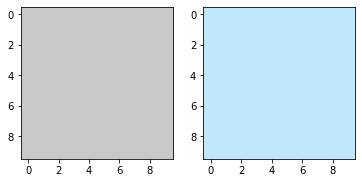

In [287]:
ligth_white = (0,0,200)
dark_white = (145,60,255)

lw_arr = np.full((10,10,3),ligth_white,dtype=np.uint8) / 255.
dw_arr = np.full((10,10,3), dark_white,dtype = np.uint8) /255.

plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(lw_arr))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(dw_arr))
plt.show()

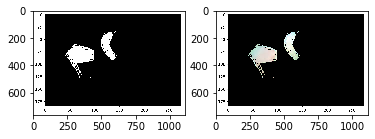

In [273]:
mask_white = cv2.inRange(hsv_nemo,ligth_white,dark_white)
result_white = cv2.bitwise_and(nemo,nemo,mask = mask_white)

>>> plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

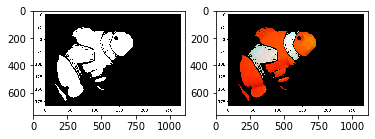

In [274]:
final_mask = mask + mask_white
final_result = cv2.bitwise_and(nemo,nemo, mask = final_mask)
plt.subplot(1,2,1)
plt.imshow(final_mask,cmap = "gray")
plt.subplot(1,2,2)
plt.imshow(final_result)
plt.show()

A Gaussian blur is an image filter that uses a kind of function called a Gaussian to transform each pixel in the image. It has the result of smoothing out image noise and reducing detail. 

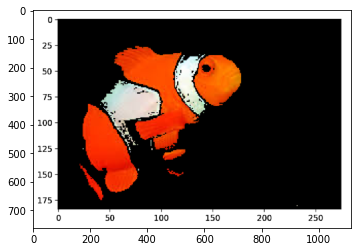

In [192]:
blur = cv2.GaussianBlur(final_result,(7,7),0)
plt.imshow(blur)
plt.show()

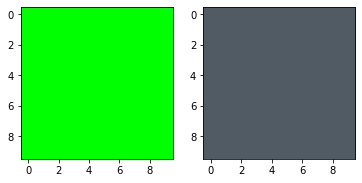

In [312]:
#Masking for plants

ligth_green = (0,255,0)
dark_green = (145,50,100)

lw_arr = np.full((10,10,3),ligth_green,dtype=np.uint8) / 255.
dw_arr = np.full((10,10,3), dark_green,dtype = np.uint8) /255.

plt.subplot(1,2,1)
plt.imshow((lw_arr))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(dw_arr))
plt.show()

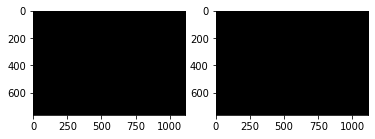

In [314]:
green_mask = cv2.inRange(hsv_nemo,ligth_green,dark_green)
green_result = cv2.bitwise_and(nemo,nemo,mask = green_mask)

plt.subplot(1, 2, 1)
plt.imshow(green_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(green_result)
plt.show()
